# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

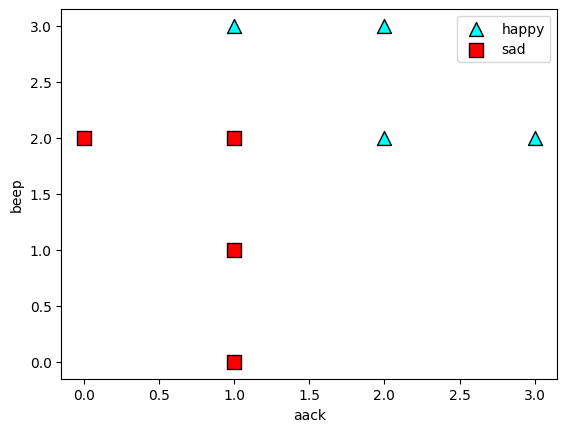

In [4]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [5]:
def step(x):
    ## TODO ##
    # implement step function
    if(x>0):
        output = 1
    else:
        output = 0
    return output

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    output = (weights@features) + bias
    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    output = step(score(weights, bias, features))
    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    predict = prediction(weights, bias, features)
    if(predict != label):
        output = np.abs(score(weights, bias, features))
    else:
        output = 0
    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [6]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    predict = prediction(weights, bias, features)
    weights = weights + learning_rate*(label-predict)*features
    bias = bias + learning_rate*(label-predict)
    return weights, bias

### Running the perceptron algorithm

In [9]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    # append mean mean_perceptron_error in the errors list after each epoch
    for i in range(epochs):
        index = random.randint(0,len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[index], labels[index], learning_rate )
        errors.append(mean_perceptron_error(weights, bias, features, labels))

    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

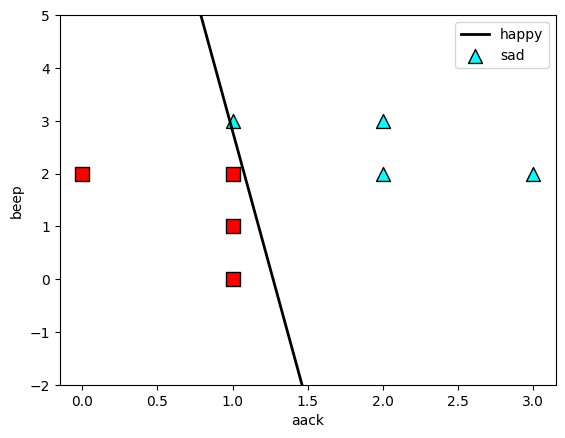

(array([0.52, 0.05]), np.float64(-0.6600000000000004))

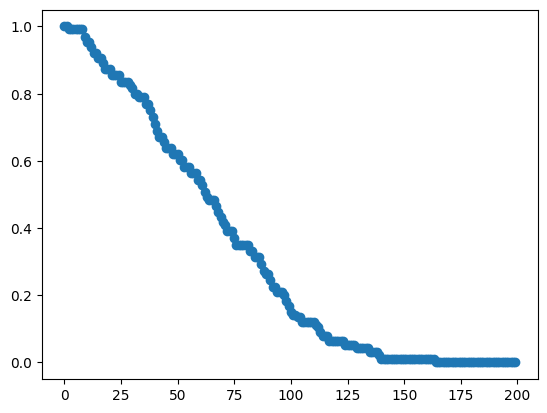

In [10]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [11]:
from sklearn.linear_model import SGDClassifier
## TODO ##
# choose loss to be "perceptron" and tol = None
clf= SGDClassifier(loss='perceptron',tol=None)
clf.fit(features,labels)

SGDClassifier(loss='perceptron', tol=None)

In [12]:
clf.score(features, labels)

1.0

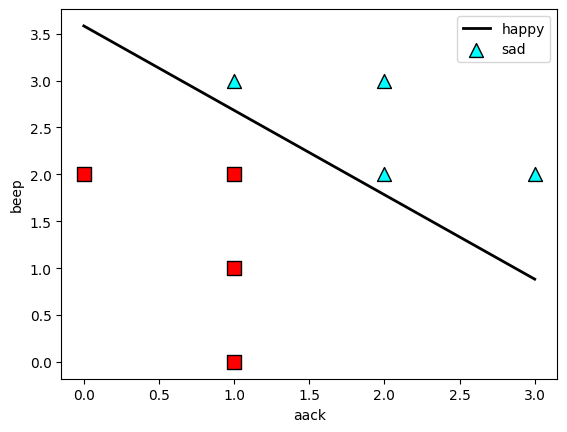

In [13]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()